<h><font size=5>PART-A</font></h>

1.Import and Understand the data [12 Marks]

 A.Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]Hint: You can extract it       Manually by losing 2 marks.
    
 B.Map the images from train folder with train labels to form a DataFrame. [6 Marks]Hint: Create a DataFrame with 3 columns:     Name of image, Species/class/type of image & actual image..
        
 C.Write a function that will select n random images and display images along with its species. [4 Marks]Hint: If input for       function is 5, it should print 5 random images along with its labels.

In [1]:
from zipfile import ZipFile
with ZipFile("plant-seedlings-classification.zip",'r') as zObj:
 zObj.extractall()

In [2]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
import tensorflow as tf
ScaleTo = 70 # px to scale
seed = 7

path = '.\\plant-seedlings-classification\\train\\*\\*.PNG'
files = glob(path)

trainImg = []
trainLabel = []
trainimageName=[]
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
  print(str(j) + "/" + str(num), end="\r")
  trainImg.append(cv2.resize(cv2.imread(img),(ScaleTo,ScaleTo))) # Get image(with resizing)
  trainLabel.append(img.split('\\')[-2])#Get image Label(folder Name)
  trainimageName.append(img.split('\\')[-1])
  j +=1

trainImg1 = np.asarray(trainImg) # Train images set
trainLabel1 =  np.asarray(trainLabel) # Train label set
trainimageName=np.asarray(trainimageName)

C:\installs\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


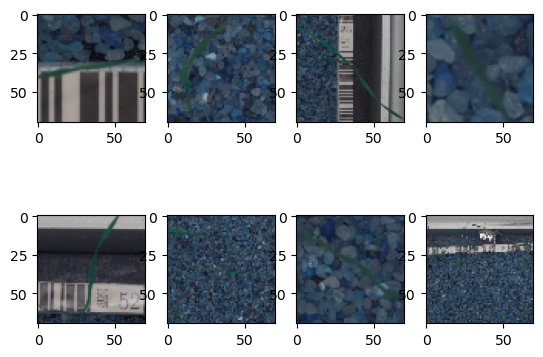

In [3]:
# show some example images
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(trainImg[i])
    

In [4]:
df=pd.DataFrame({'label':list(trainLabel),
                 'image':list(trainImg),
                'imagename':list(trainimageName)},
                columns=['label','image','imagename'])
#df.reset_index(inplace=True)

In [5]:
df

,label,image,imagename
0,Black-grass,"[[[22, 46, 77], [38, 60, 83], [69, 88, 107], [...",0050f38b3.png
1,Black-grass,"[[[45, 51, 58], [48, 52, 67], [59, 75, 92], [9...",0183fdf68.png
2,Black-grass,"[[[20, 31, 46], [24, 40, 53], [42, 55, 69], [3...",0260cffa8.png
3,Black-grass,"[[[49, 83, 107], [51, 85, 108], [52, 86, 109],...",05eedce4d.png
4,Black-grass,"[[[170, 170, 169], [166, 164, 163], [176, 172,...",075d004bc.png
...,...,...,...
4745,Sugar beet,"[[[81, 78, 80], [112, 104, 108], [175, 166, 16...",fc293eacb.png
4746,Sugar beet,"[[[35, 64, 93], [14, 46, 78], [22, 45, 75], [3...",fc441208c.png
4747,Sugar beet,"[[[53, 69, 77], [52, 67, 79], [48, 60, 75], [4...",fed9406b2.png
4748,Sugar beet,"[[[145, 143, 146], [150, 151, 151], [154, 153,...",fef5e7066.png


In [6]:
dataframe=df

In [7]:
df.dtypes

label        object
image        object
imagename    object
dtype: object

In [8]:
dataframe['label'].unique()

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [9]:
df['image'].dtypes

dtype('O')

enter a number5
                  label                                              image  \
3389  Scentless Mayweed  [[[69, 84, 97], [76, 92, 101], [80, 96, 102], ...   
2685   Loose Silky-bent  [[[60, 69, 85], [50, 69, 88], [47, 71, 89], [3...   
955    Common Chickweed  [[[23, 37, 56], [39, 53, 69], [46, 60, 75], [5...   

          imagename  
3389  7917df3ec.png  
2685  ab47c78db.png  
955   04b597a3f.png  
None



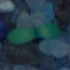
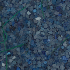
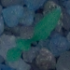


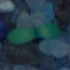
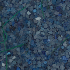
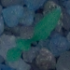

In [10]:
import ipyplot
n=input('enter a number')
df1 = df.sample(n = 3)
print(df1)
print(df1.reset_index(inplace=True))
ipyplot.plot_images(df1['image'])

2.Data preprocessing [8 Marks]

A.Create X & Y from the DataFrame. [2 Marks]

B.Encode labels of the images. [2 Marks]

C.Unify shape of all the images. [2 Marks]

D.Normalise all the images. [2 Marks]

In [11]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])
df['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
df.convert_dtypes().dtypes 

label         Int32
image        object
imagename    string
dtype: object

In [14]:
df.head()

,label,image,imagename
0,0,"[[[22, 46, 77], [38, 60, 83], [69, 88, 107], [...",0050f38b3.png
1,0,"[[[45, 51, 58], [48, 52, 67], [59, 75, 92], [9...",0183fdf68.png
2,0,"[[[20, 31, 46], [24, 40, 53], [42, 55, 69], [3...",0260cffa8.png
3,0,"[[[49, 83, 107], [51, 85, 108], [52, 86, 109],...",05eedce4d.png
4,0,"[[[170, 170, 169], [166, 164, 163], [176, 172,...",075d004bc.png


In [23]:
X=df.drop(['label','imagename'],axis=1)
y=df['label']

In [15]:
x=trainImg1

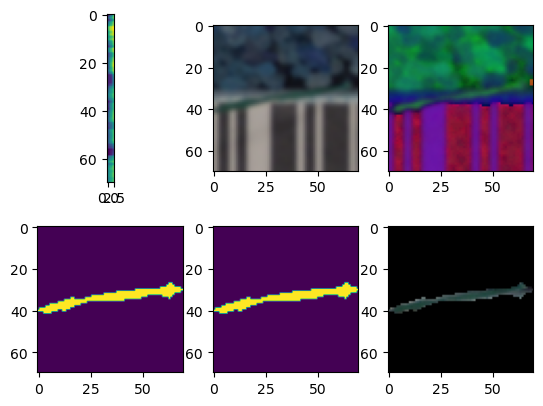

In [18]:
clearTrainImg = []
examples = []; getEx = True
for img in x:
  # Use gaussian blur
  blurImg = cv2.GaussianBlur(img, (5,5),0)

  # Convert to HSV image
  hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)

  # Create mask (parameters - green color range)
  lower_green = (25, 40, 50)
  upper_green = (75, 255, 255)
  mask = cv2.inRange(hsvImg, lower_green, upper_green)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
  mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)

  # Create bool mask
  bMask= mask >0

  # Apply the mask
  clear = np.zeros_like(img, np.uint8) # Create empty image
  clear[bMask] = img[bMask] #Apply boolean mask to the origin image
  clearTrainImg.append(clear) # Append image without background

  # Show examples
  if getEx:
    plt.subplot(2,3,1);plt.imshow(img[1]) # show the original image
    plt.subplot(2,3,2);plt.imshow(blurImg) # show Blur image
    plt.subplot(2,3,3);plt.imshow(hsvImg) # show HSV image
    plt.subplot(2,3,4);plt.imshow(mask) # Mask
    plt.subplot(2,3,5);plt.imshow(bMask) # Boolean mask
    plt.subplot(2,3,6);plt.imshow(clear) # Image without background
    getEx = False

clearTrainImg = np.asarray(clearTrainImg)

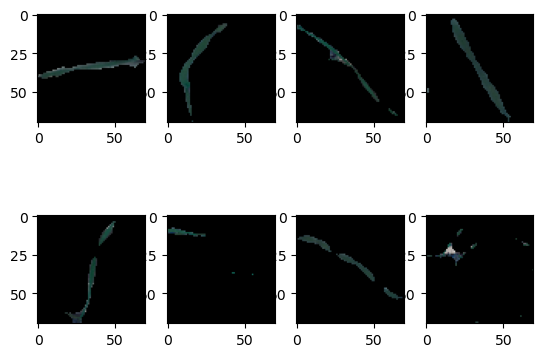

In [19]:
# show sample results
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(clearTrainImg[i])

In [20]:
clearTrainImg = clearTrainImg /255

3.Model training [10 Marks]Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.
    
   A.Split the data into train and test data. [2 Marks]
    
   B.Create new CNN architecture to train the model. [4 Marks]
    
   C.Train the model on train data and validate on test data. [2 Marks]
   
   D.Select a random image and print actual label and predicted label for the same. [2 Marks]

    


In [21]:
x.shape

(4750, 70, 70, 3)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=180, zoom_range = 0.1, width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,vertical_flip=True)
datagen.fit(train_X)

In [26]:
print('\nTraining data : ', train_X.shape)
print('\nTesting data : ', test_X.shape) 


Training data :  (3800, 70, 70, 3)

Testing data :  (950, 70, 70, 3)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model = Sequential()

model.add(BatchNormalization(input_shape = (70, 70, 3)))

model.add(Convolution2D(filters = 16, kernel_size = (3,3), activation ='relu', input_shape = (70, 70, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Convolution2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

# fully connected layer
model.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model.add(Dense(units = 12, activation = 'softmax'))

In [28]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 70, 70, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 68, 68, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                        

In [29]:
import tensorflow as tf
histroy=model.fit(train_X, train_Y, epochs = 5, validation_data = (test_X, test_Y), initial_epoch=0,callbacks=[tf.keras.callbacks.CSVLogger('his.csv')])

Epoch 1/5
119/119 [==============================] - 8s 58ms/step - loss: 1.9589 - accuracy: 0.3376 - val_loss: 2.2731 - val_accuracy: 0.3326
Epoch 2/5
119/119 [==============================] - 7s 56ms/step - loss: 1.0995 - accuracy: 0.6211 - val_loss: 1.0681 - val_accuracy: 0.6463
Epoch 3/5
119/119 [==============================] - 7s 57ms/step - loss: 0.7603 - accuracy: 0.7447 - val_loss: 0.8522 - val_accuracy: 0.7021
Epoch 4/5
119/119 [==============================] - 7s 57ms/step - loss: 0.5726 - accuracy: 0.8147 - val_loss: 0.7427 - val_accuracy: 0.7579
Epoch 5/5
119/119 [==============================] - 7s 57ms/step - loss: 0.4439 - accuracy: 0.8537 - val_loss: 0.7821 - val_accuracy: 0.7474


Text(0.5, 1.0, 'Training and validation loss')

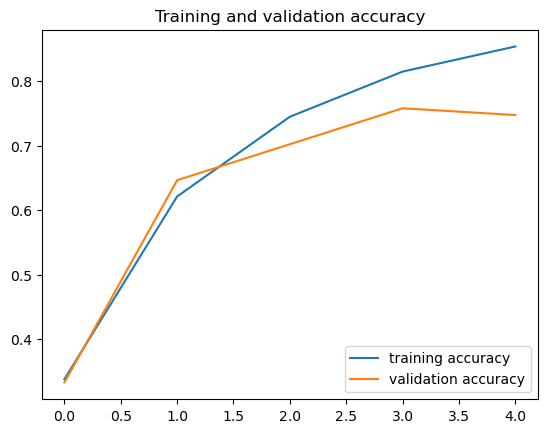

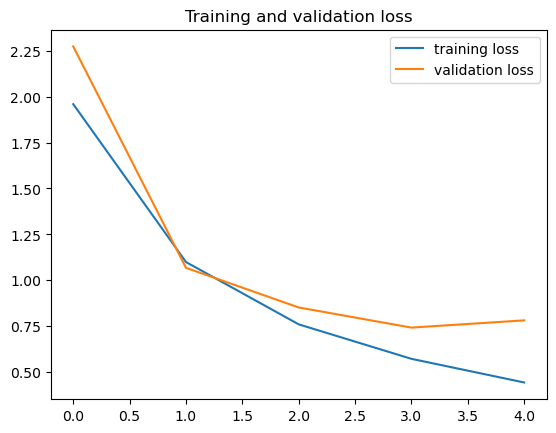

In [30]:
## Accuracy and Loss plots

accuracy      = histroy.history['accuracy']
val_accuracy  = histroy.history['val_accuracy']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

labels: 2
30/30 [==============================] - 0s 10ms/step
Softmax Outputs: [[2.7067161e-11 1.1592817e-09 5.4007929e-14 ... 3.7734778e-04
  2.2436805e-06 5.2391042e-10]
 [3.2445823e-07 5.5414275e-06 8.0036243e-06 ... 8.6253829e-04
  9.9895018e-01 4.4725152e-06]
 [2.2539566e-03 4.7690063e-03 1.2327911e-04 ... 5.3540688e-02
  7.0876227e-04 8.6827517e-02]
 ...
 [2.6188258e-04 2.4073698e-04 2.9695666e-04 ... 2.5174060e-01
  1.8137352e-03 5.2428246e-01]
 [2.2658236e-05 3.6035828e-05 9.1784580e-07 ... 3.9480636e-03
  3.7009919e-05 4.7959527e-04]
 [2.0238347e-04 5.0883642e-05 1.8018900e-05 ... 1.0680306e-02
  7.7547709e-04 4.2016418e-03]]
950.0
Predicted_Label: 0


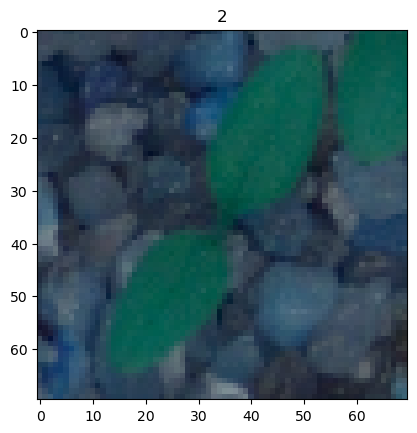

In [31]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = 767
print('labels:', df['label'][n])
plt.title(test_Y[n])
plt.imshow(test_X[n])
y_pred = model.predict(test_X)
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('Predicted_Label:', df['label'][j])

<h><font size=5>PART-B</font></h>

Import and Understand the data [5 Marks]

A.Import and read oxflower17 dataset from tflearn and split into X and Y while loading.
[2 Marks]Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.It can be loaded using: x, y = oxflower17.load_data()
        
B.Print Number of images and shape of the images. [1 Marks]

C.Print count of each class from y. [2 Marks]



In [32]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution(config=None,device_policy=None,execution_mode=None)

import tflearn.datasets.oxflower17 as oxflower17
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [33]:
x,y=oxflower17.load_data()

In [34]:
x.shape

(1360, 224, 224, 3)

In [35]:
y.shape

(1360,)

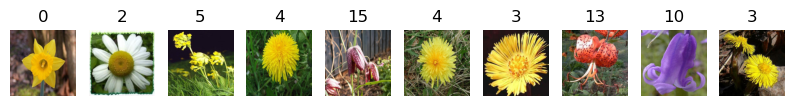

In [36]:
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
N=10 # NUMBER OF IMAGES YOU WISH TO SEE

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(x[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(y[i]))
    plt.axis('off')
plt.show()

In [37]:
# ANALYZE LABELS

Labels = np.unique(y)  # DISPLAY UNIQUE LABELS

NumberOfLabels = len(Labels)  # LENGTH OF UNIQUES LABELS

print('\nLabels : ', Labels)

print('\nTotal number of labels : ', NumberOfLabels)


Labels :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Total number of labels :  17


In [38]:
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80],
       dtype=int64))

In [39]:
import random

# Original Image
img_org = random.choice(x)

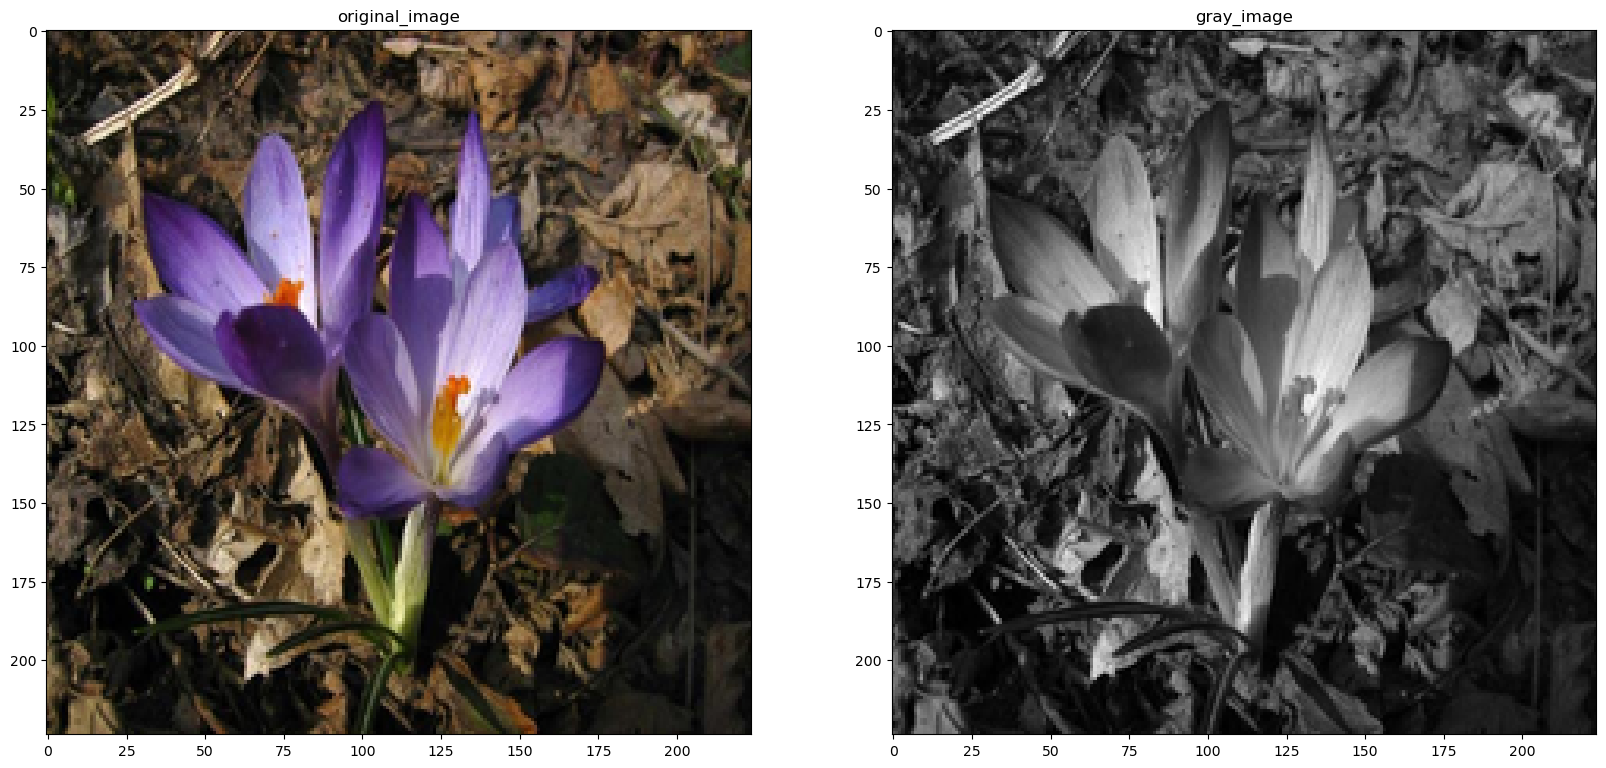

In [40]:
import cv2
# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)
img_title = ['original_image', 'gray_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image]):
    plt.subplot(1,2,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

In [41]:
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

In [42]:
sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


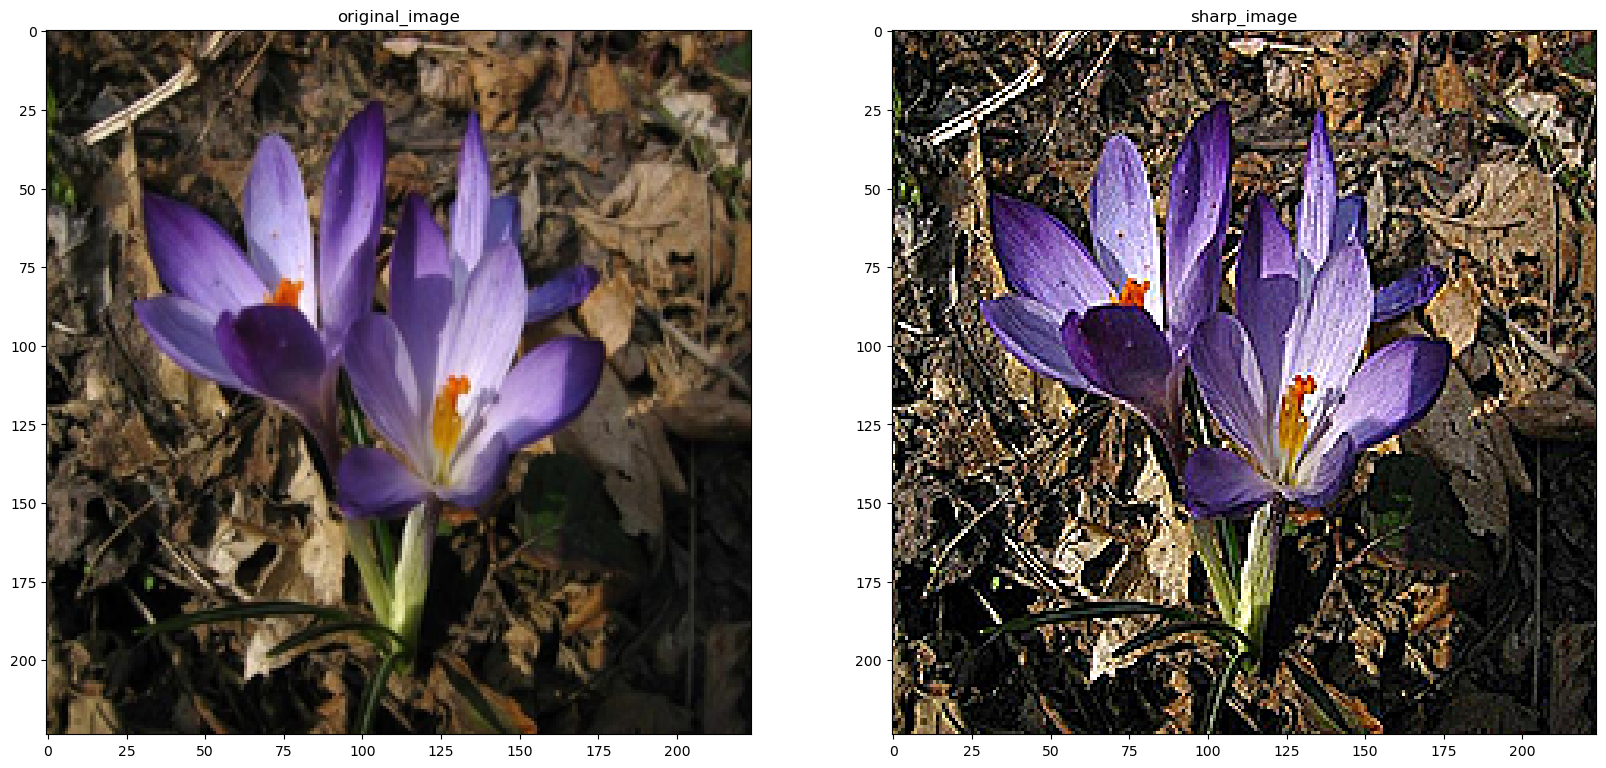

In [43]:
img_title1 = ['original_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org,sharp_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title1[i])
    plt.imshow(img,cmap='gray')

In [44]:
# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

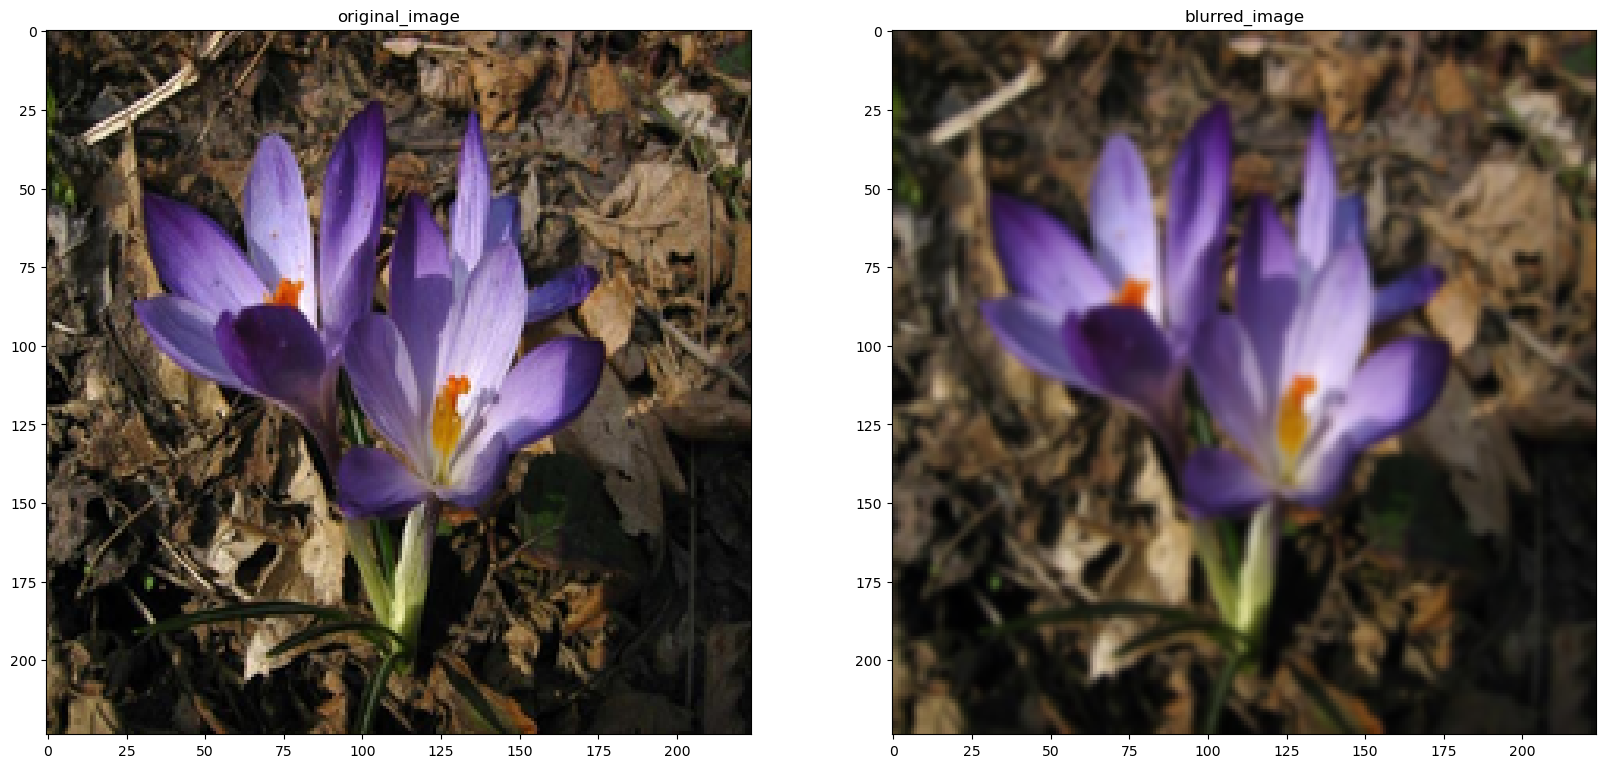

In [45]:
img_title2 = ['original_image','blurred_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, blur_img]):
    plt.subplot(1,2,i+1)
    plt.title(img_title2[i])
    plt.imshow(img,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


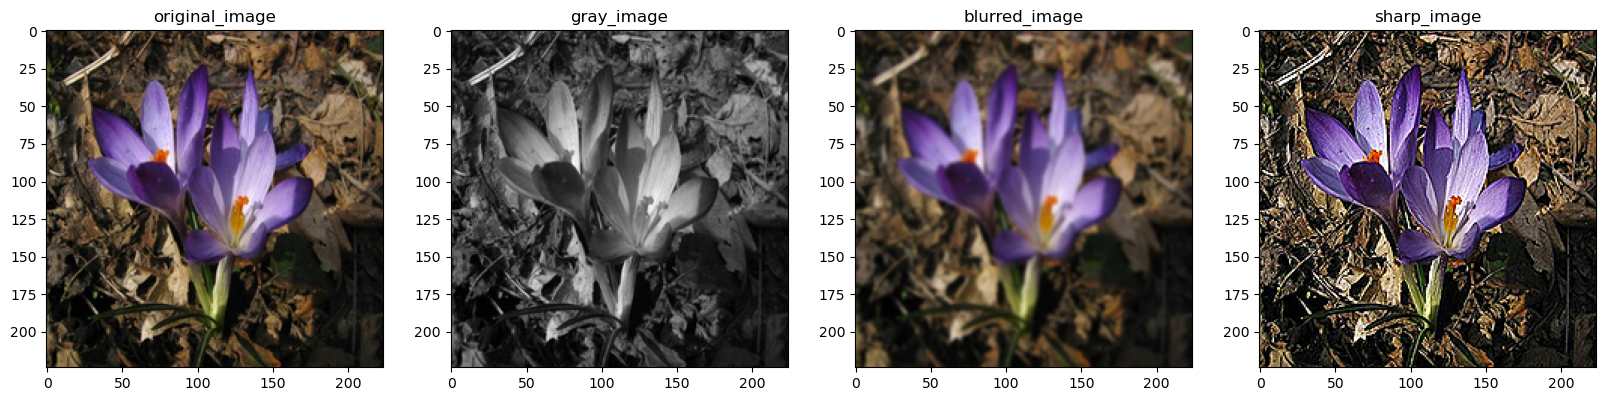

In [46]:
img_title_all = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title_all[i])
    plt.imshow(img,cmap='gray')

In [47]:
X = np.array(x)
y = np.array(y)

print(X.shape, y.shape)

(1360, 224, 224, 3) (1360,)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
 X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0], 150528) # 128X128X3 = 49152
X_train_ML = X_train_ML/255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], 150528)
X_test_ML = X_test_ML/255

#y_train_ML = y_train.reshape(y_train.shape[0], 1)
#y_test_ML = y_test.reshape(y_test.shape[0], 1)


print('Train_Shape:', X_train_ML.shape, y_train.shape)
print('Test_Shape:', X_test_ML.shape, y_test.shape)

Train_Shape: (1088, 150528) (1088,)
Test_Shape: (272, 150528) (272,)


In [50]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogR = LogisticRegression()
LogR.fit(X_train_ML, y_train)

y_pred_lrt=LogR.predict(X_train_ML)
LogR_Accuracy_Train = accuracy_score(y_true=y_train, y_pred=y_pred_lrt)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred_lrte = LogR.predict(X_test_ML)
LogR_Accuracy_Test = accuracy_score(y_true=y_test, y_pred=y_pred_lrte)
print("Test Accuracy : ", LogR_Accuracy_Test)

Train Accuracy :  0.5284926470588235
Test Accuracy :  0.34191176470588236


In [51]:
# SVM - Model

from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_ML, y_train)

SVM_Accuracy=SVM.score(X_train_ML, y_train)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(X_test_ML, y_test)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  0.9246323529411765
Test Accuracy :  0.5036764705882353


In [52]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3) # Best neighbors to be identified
KNN.fit(X_train_ML, y_train)

y_pred_tr_knn = KNN.predict(X_train_ML)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred_tr_knn)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred_ts_knn = KNN.predict(X_test_ML)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred_ts_knn)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.6167279411764706
Test Accuracy :  0.3125


In [53]:
# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='gini',
                                splitter='best',
                                max_depth=5)

model_DT.fit(X_train_ML, y_train)

# Accuracy
DT_Train=model_DT.score(X_train_ML, y_train)
DT_Test=model_DT.score(X_test_ML, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.42003676470588236
Test Accuracy: 0.20220588235294118


In [54]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=5)
model_RF.fit(X_train_ML, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_ML)
RF_Train = model_RF.score(X_train_ML, y_train)
RF_Test = accuracy_score(y_test, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.7674632352941176
Test Accuracy: 0.36764705882352944


In [55]:
# ADA Boosting

# Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Model
model = AdaBoostClassifier( base_estimator=None,    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,)
model_AB = model.fit(X_train_ML, y_train)

# Accuracy
AB_Train = model_AB.score(X_train_ML, y_train)
pred_AB =model_AB.predict(X_test_ML)
acc_AB = accuracy_score(y_test, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

Train Accuracy: 0.13143382352941177
Test Accuracy: 0.10294117647058823


In [56]:
# Changing the Target parameter as per the requirement of the NN model

# one hot encode outputs
import pandas as pd
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [57]:
### define model


import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


# create model
model = tf.keras.Sequential()  
model.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer
    
model.add(Dense(1, activation='relu')) ###Multiple Dense units with Relu activation



    
# Compile model
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
    optimizer='sgd',
              loss='mse',
              metrics=['acc']
                       )
# Fit the model
model.fit(X_train_ML, y_train, epochs=30, batch_size=8)

Instructions for updating:
Colocations handled automatically by placer.
Train on 1088 samples
Epoch 1/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 26.6583 - acc: 0.0597
Epoch 2/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 16.8667 - acc: 0.0597
Epoch 3/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 15.2463 - acc: 0.0588
Epoch 4/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 15.0921 - acc: 0.0588
Epoch 5/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 15.6254 - acc: 0.0597
Epoch 6/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 14.3563 - acc: 0.0616
Epoch 7/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 13.9944 - acc: 0.0625
Epoch 8/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 15.4969 - acc: 0.0607
Epoch 9/30
1088/1088 [==============================] - 1s 1ms/sample - loss: 14.0140 - acc: 0.0597
Epoch 

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (224, 224, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))


model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 17, activation = 'softmax'))

In [59]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 224, 224, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                      

In [60]:
import tensorflow as tf
histroy=model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), initial_epoch=0,callbacks=[tf.keras.callbacks.CSVLogger('his.csv')])

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - ETA: 0s - loss: 4.6636 - acc: 0.1268

C:\installs\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 29s 27ms/sample - loss: 4.6636 - acc: 0.1268 - val_loss: 2.5078 - val_acc: 0.2169
Epoch 2/10
1088/1088 [==============================] - 29s 26ms/sample - loss: 1.9156 - acc: 0.3465 - val_loss: 2.1073 - val_acc: 0.2978
Epoch 3/10
1088/1088 [==============================] - 28s 26ms/sample - loss: 1.5231 - acc: 0.4743 - val_loss: 1.8815 - val_acc: 0.3787
Epoch 4/10
1088/1088 [==============================] - 28s 26ms/sample - loss: 1.0678 - acc: 0.6480 - val_loss: 1.7632 - val_acc: 0.4265
Epoch 5/10
1088/1088 [==============================] - 28s 26ms/sample - loss: 0.5833 - acc: 0.8199 - val_loss: 1.5620 - val_acc: 0.5000
Epoch 6/10
1088/1088 [==============================] - 28s 26ms/sample - loss: 0.2185 - acc: 0.9494 - val_loss: 1.6901 - val_acc: 0.4559
Epoch 7/10
1088/1088 [==============================] - 28s 26ms/sample - loss: 0.0985 - acc: 0.9825 - val_loss: 1.7979 - val_acc: 0.4816
Epoch 8/10
1088/1088 [=======================

In [67]:
# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train, 
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


#Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
 #                          'Test accuracy': NB_Accuracy_Test},)
#Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train, 
                           'Test accuracy': DT_Test})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LogR_Accuracy_Train, 
                            'Test accuracy': LogR_Accuracy_Test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]

Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train, 
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]




Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train, 
                           'Test accuracy': acc_AB})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]


Comparison9 = pd.DataFrame({'Method':['Neural Network'], 'Train accuracy': max(accuracy), 
                           'Test accuracy': max(val_accuracy)})
Comparison9 = Comparison9[['Method', 'Train accuracy', 'Test accuracy']]


#Comparison10 = pd.DataFrame({'Method':['conNeural Network'], 'Train accuracy': max(accuracy), 
 #                          'Test accuracy': max(val_accuracy)})
#Comparison10 = Comparison10[['Method', 'Train accuracy', 'Test accuracy']]



Comparison = pd.concat([Comparison1,Comparison3,Comparison4,Comparison5,Comparison6,Comparison8, Comparison9])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,0.528493,0.341912
0,KNN,0.616728,0.312500
0,SVM,0.420037,0.202206
0,Decision Tree,0.528493,0.341912
0,Random Forest,0.767463,0.367647
0,ADA Boosting,0.131434,0.102941
0,Neural Network,0.853684,0.757895


In [68]:
img1 = cv2.imread("Prediction+-+Flower.jpg")
 

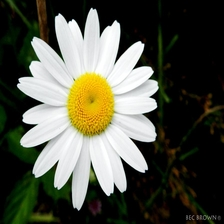

In [69]:
tf.keras.preprocessing.image.load_img("Prediction+-+Flower.jpg"
    , grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)

In [70]:
import imageio as iio
img = iio.imread("Prediction+-+Flower.jpg")

C:\Users\Sandeep Basetty\AppData\Local\Temp\ipykernel_20224\4200205665.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("Prediction+-+Flower.jpg")


In [71]:
img1=np.array(img)

In [80]:
import keras.utils as image
import keras
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import numpy as np
from PIL import Image
test_image = image.load_img("Prediction+-+Flower.jpg",target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
#test_image = test_image.reshape(-1,3*224*224)

result = model_1.predict(test_image)


In [81]:
if result[0][0]==1:
    print('0')
elif result[0][1]==1:
    print('1')
elif result[0][2]==1:
    print('3')
elif result[0][3]==1:
    print('4')
elif result[0][4]==1:
    print("5")
elif result[0][5]==1:
    print('6')
elif result[0][6]==1:
    print('7')
elif result[0][7]==1:
    print('8')
elif result[0][8]==1:
    print("9")
elif result[0][9]==1:
    print('10')
elif result[0][10]==1:
    print('11')
elif result[0][11]==1:
    print('12')
elif result[0][12]==1:
    print("13")
elif result[0][13]==1:
    print('14')
elif result[0][14]==1:
    print('15')
elif result[0][15]==1:
    print('16')


8
